In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/machine learning/framingham.csv'
disease_df = pd.read_csv(path)
disease_df.head()


Mounted at /content/drive


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
print(disease_df.shape)
print(disease_df.isnull().sum())


(4240, 16)
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [3]:
disease_df.drop(columns=['education'], inplace=True, axis=1)
disease_df.rename(columns={'male':'Sex_male'}, inplace=True)
disease_df.dropna(axis=0, inplace=True)
disease_df.shape


(3751, 15)

/tmp/ipython-input-2913770445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")


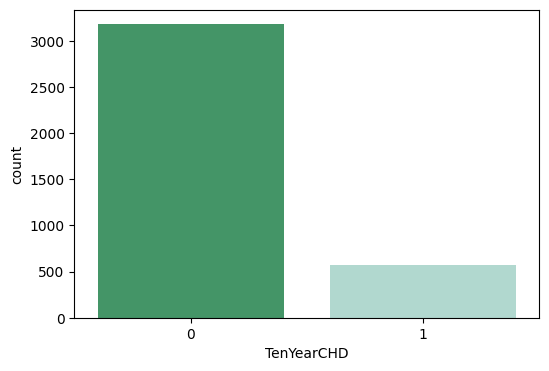

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")
plt.show()
print(disease_df['TenYearCHD'].value_counts())


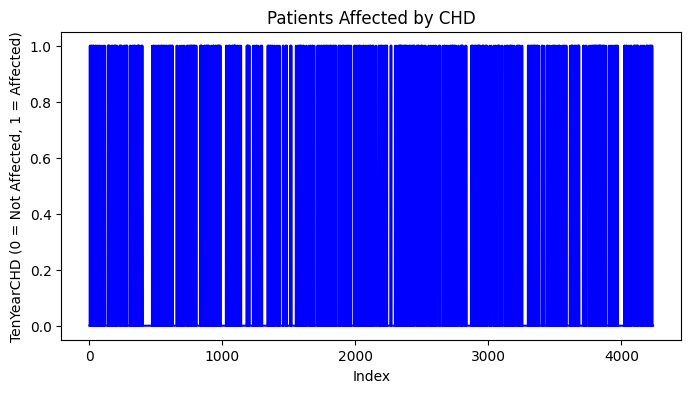

In [5]:
disease_df['TenYearCHD'].plot(kind='line', color='blue', figsize=(8,4))
plt.title('Patients Affected by CHD')
plt.xlabel('Index')
plt.ylabel('TenYearCHD (0 = Not Affected, 1 = Affected)')
plt.show()


In [6]:
features = ['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']
X = disease_df[features].to_numpy()
y = disease_df['TenYearCHD'].to_numpy()


In [7]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=4, stratify=y)
print(X_train.shape, X_test.shape)


(2625, 6) (1126, 6)


In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


Accuracy = 0.8534635879218473
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       954
           1       0.77      0.06      0.11       172

    accuracy                           0.85      1126
   macro avg       0.81      0.53      0.51      1126
weighted avg       0.84      0.85      0.80      1126



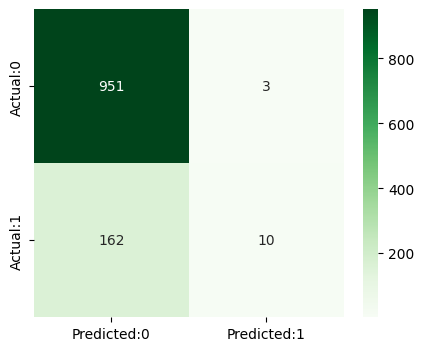

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy =', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.show()

